In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("enriched_covid_19_week_2.csv", sep=",")

In [3]:
df.head()

Id Country_Region Province_State        Date  ConfirmedCases  Fatalities  \
0   1    Afghanistan            NaN  2020-01-22             0.0         0.0   
1   2    Afghanistan            NaN  2020-01-23             0.0         0.0   
2   3    Afghanistan            NaN  2020-01-24             0.0         0.0   
3   4    Afghanistan            NaN  2020-01-25             0.0         0.0   
4   5    Afghanistan            NaN  2020-01-26             0.0         0.0   

    age_0-4   age_5-9  age_10-14  age_15-19  ...  smokers_perc  density  \
0  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
1  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
2  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
3  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
4  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   

   urbanpop  hospibed   lung  femalelung  malelung  restrictions  quarantine  \
0      25.0       0.5  37.62       36.31     39.33             0           0   
1      25.0       0.5  37.62       36.31     39.33             0           0   
2      25.0       0.5  37.62       36.31     39.33             0           0   
3      25.0       0.5  37.62       36.31     39.33             0           0   
4      25.0       0.5  37.62       36.31     39.33             0           0   

   schools  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 38 columns]

In [4]:
df.dtypes

Id                  int64
Country_Region     object
Province_State     object
Date               object
ConfirmedCases    float64
Fatalities        float64
age_0-4           float64
age_5-9           float64
age_10-14         float64
age_15-19         float64
age_20-24         float64
age_25-29         float64
age_30-34         float64
age_35-39         float64
age_40-44         float64
age_45-49         float64
age_50-54         float64
age_55-59         float64
age_60-64         float64
age_65-69         float64
age_70-74         float64
age_75-79         float64
age_80-84         float64
age_85-89         float64
age_90-94         float64
age_95-99         float64
age_100+          float64
total_pop         float64
smokers_perc      float64
density           float64
urbanpop          float64
hospibed          float64
lung              float64
femalelung        float64
malelung          float64
restrictions        int64
quarantine          int64
schools             int64
dtype: objec

In [5]:
# 38 attributs et 18816 lignes
df.shape

(18816, 38)

In [6]:
df.count()

Id                18816
Country_Region    18816
Province_State     8000
Date              18816
ConfirmedCases    18816
Fatalities        18816
age_0-4           18816
age_5-9           18816
age_10-14         18816
age_15-19         18816
age_20-24         18816
age_25-29         18816
age_30-34         18816
age_35-39         18816
age_40-44         18816
age_45-49         18816
age_50-54         18816
age_55-59         18816
age_60-64         18816
age_65-69         18816
age_70-74         18816
age_75-79         18816
age_80-84         18816
age_85-89         18816
age_90-94         18816
age_95-99         18816
age_100+          18816
total_pop         18816
smokers_perc      18816
density           18816
urbanpop          18816
hospibed          18816
lung              18816
femalelung        18816
malelung          18816
restrictions      18816
quarantine        18816
schools           18816
dtype: int64

In [7]:
df.describe(include = 'all')

Id            Country_Region Province_State        Date  \
count   18816.000000                     18816           8000       18816   
unique           NaN                       294            125          64   
top              NaN  Central African Republic        Bermuda  2020-02-14   
freq             NaN                        64             64         294   
mean    14682.500000                       NaN            NaN         NaN   
std      8487.245502                       NaN            NaN         NaN   
min         1.000000                       NaN            NaN         NaN   
25%      7332.750000                       NaN            NaN         NaN   
50%     14682.500000                       NaN            NaN         NaN   
75%     22032.250000                       NaN            NaN         NaN   
max     29364.000000                       NaN            NaN         NaN   

        ConfirmedCases    Fatalities       age_0-4       age_5-9  \
count     18816.000000  18816.000000  18816.000000  18816.000000   
unique             NaN           NaN           NaN           NaN   
top                NaN           NaN           NaN           NaN   
freq               NaN           NaN           NaN           NaN   
mean        343.114052     12.672619      0.077679      0.076866   
std        3580.120962    183.124487      0.034309      0.029106   
min           0.000000      0.000000      0.037001      0.037752   
25%           0.000000      0.000000      0.058006      0.060261   
50%           0.000000      0.000000      0.059204      0.060526   
75%          15.000000      0.000000      0.091752      0.093138   
max       74386.000000   7503.000000      0.197775      0.164027   

           age_10-14     age_15-19  ...  smokers_perc       density  \
count   18816.000000  18816.000000  ...  18816.000000  18816.000000   
unique           NaN           NaN  ...           NaN           NaN   
top              NaN           NaN  ...           NaN           NaN   
freq             NaN           NaN  ...           NaN           NaN   
mean        0.073895      0.070090  ...     21.806554    259.867347   
std         0.023809      0.019475  ...      6.875745   1614.580586   
min         0.040971      0.036786  ...      2.000000      2.000000   
25%         0.058543      0.057209  ...     20.600000     95.000000   
50%         0.063818      0.064197  ...     21.389448     95.000000   
75%         0.085218      0.080954  ...     25.600000     95.000000   
max         0.138175      0.123661  ...     45.900000  26337.000000   

            urbanpop      hospibed          lung    femalelung      malelung  \
count   18816.000000  18816.000000  18816.000000  18816.000000  18816.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       65.551020      3.019810     22.239388     17.120833     28.930748   
std        14.944822      1.877733     11.122376      9.912089     13.868133   
min        15.000000      0.300000      7.870000      0.690000      9.210000   
25%        67.000000      2.700000     20.610000     16.065000     26.700000   
50%        67.000000      2.700000     20.610000     16.065000     26.700000   
75%        67.000000      2.700000     20.610000     16.065000     26.700000   
max       100.000000     13.800000    114.280000     94.590000    174.880000   

        restrictions    quarantine       schools  
count   18816.000000  18816.000000  18816.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean        0.008610      0.006803      0.014987  
std         0.092391      0.082200      0.121505  
min         0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000  
50%

In [8]:
# 294 zones géographiques uniques (64 * 294)
df.Country_Region.value_counts()

Central African Republic    64
Eswatini                    64
Canada_Quebec               64
Bhutan                      64
Italy                       64
                            ..
Saint Kitts and Nevis       64
US_Nevada                   64
Haiti                       64
China_Gansu                 64
US_Utah                     64
Name: Country_Region, Length: 294, dtype: int64

In [9]:
# PAS TRES UTILE
# Toutes les données n'ont pas la même date de début de prise des données
# On essaye de connaître les pays où a commencé l'épidémie
df_pays = df.loc[df["Date"] == "2020-01-22"]
df_pays.head()

Id Country_Region Province_State        Date  ConfirmedCases  \
0      1    Afghanistan            NaN  2020-01-22             0.0   
64   101        Albania            NaN  2020-01-22             0.0   
128  201        Algeria            NaN  2020-01-22             0.0   
192  301        Andorra            NaN  2020-01-22             0.0   
256  401         Angola            NaN  2020-01-22             0.0   

     Fatalities   age_0-4   age_5-9  age_10-14  age_15-19  ...  smokers_perc  \
0           0.0  0.145717  0.139133   0.133376   0.118922  ...     21.389448   
64          0.0  0.057780  0.058223   0.056356   0.069357  ...     28.700000   
128         0.0  0.114969  0.105721   0.087145   0.066369  ...     15.600000   
192         0.0  0.091752  0.093138   0.079824   0.072232  ...     33.500000   
256         0.0  0.176321  0.155301   0.132332   0.107482  ...     21.389448   

     density  urbanpop  hospibed   lung  femalelung  malelung  restrictions  \
0       60.0      25.0       0.5  37.62      36.310     39.33             0   
64     105.0      63.0       2.9  11.67       7.020     17.04             0   
128     18.0      73.0       1.9   8.77       5.030     12.81             0   
192    164.0      88.0       2.5  20.61      16.065     26.70             0   
256     95.0      67.0       2.7  20.61      16.065     26.70             0   

     quarantine  schools  
0             0        0  
64            0        0  
128           0        0  
192           0        0  
256           0        0  

[5 rows x 38 columns]

In [10]:
df_pays.shape

(294, 38)

In [11]:
# Etude des pays ayant eu des cas confirmés => objectif avoir la date de début pour chaque pays
df_pays_confirmed_cases = df.loc[df["ConfirmedCases"] > 0.0]
df_pays_confirmed_cases.head()

Id Country_Region Province_State        Date  ConfirmedCases  Fatalities  \
33  34    Afghanistan            NaN  2020-02-24             1.0         0.0   
34  35    Afghanistan            NaN  2020-02-25             1.0         0.0   
35  36    Afghanistan            NaN  2020-02-26             1.0         0.0   
36  37    Afghanistan            NaN  2020-02-27             1.0         0.0   
37  38    Afghanistan            NaN  2020-02-28             1.0         0.0   

     age_0-4   age_5-9  age_10-14  age_15-19  ...  smokers_perc  density  \
33  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
34  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
35  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
36  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   
37  0.145717  0.139133   0.133376   0.118922  ...     21.389448     60.0   

    urbanpop  hospibed   lung  femalelung  malelung  restrictions  quarantine  \
33      25.0       0.5  37.62       36.31     39.33             0           0   
34      25.0       0.5  37.62       36.31     39.33             0           0   
35      25.0       0.5  37.62       36.31     39.33             0           0   
36      25.0       0.5  37.62       36.31     39.33             0           0   
37      25.0       0.5  37.62       36.31     39.33             0           0   

    schools  
33        0  
34        0  
35        0  
36        0  
37        0  

[5 rows x 38 columns]

In [12]:
df_pays_confirmed_cases.shape

(7623, 38)

In [13]:
#pays_unique = df.Country_Region.unique().tolist()

In [14]:
date_deb_par_pays = {}
for index, row in df_pays_confirmed_cases.iterrows():
    if (row['Country_Region'] not in date_deb_par_pays.keys()):
        print(row['Country_Region'], row['Date'])
        date_deb_par_pays[row['Country_Region']] = row['Date']
      

Afghanistan 2020-02-24
Albania 2020-03-09
Algeria 2020-02-25
Andorra 2020-03-02
Angola 2020-03-20
Antigua and Barbuda 2020-03-13
Argentina 2020-03-03
Armenia 2020-03-01
Australia_Australian Capital Territory 2020-03-13
Australia_New South Wales 2020-01-26
Australia_Northern Territory 2020-03-04
Australia_Queensland 2020-01-29
Australia_South Australia 2020-02-01
Australia_Tasmania 2020-03-02
Australia_Victoria 2020-01-26
Australia_Western Australia 2020-02-29
Austria 2020-02-25
Azerbaijan 2020-03-01
Bahamas 2020-03-16
Bahrain 2020-02-24
Bangladesh 2020-03-08
Barbados 2020-03-17
Belarus 2020-02-28
Belgium 2020-02-04
Belize 2020-03-23
Benin 2020-03-16
Bhutan 2020-03-06
Bolivia 2020-03-11
Bosnia and Herzegovina 2020-03-05
Brazil 2020-02-26
Brunei 2020-03-09
Bulgaria 2020-03-08
Burkina Faso 2020-03-10
Cabo Verde 2020-03-20
Cambodia 2020-01-27
Cameroon 2020-03-06
Canada_Alberta 2020-03-06
Canada_British Columbia 2020-01-28
Canada_Manitoba 2020-03-13
Canada_New Brunswick 2020-03-11
Canada_Ne

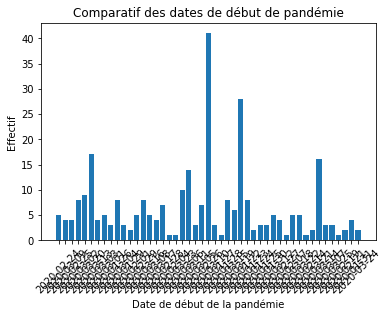

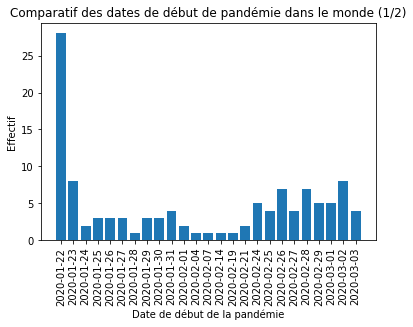

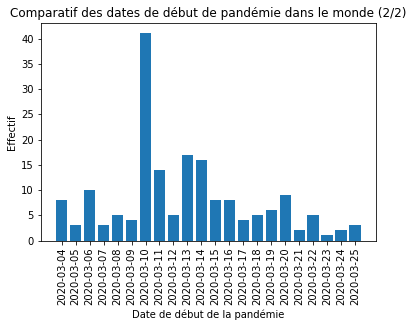

In [42]:
def listToDict(list):
    res = {}
    for a,b in list:
        res[a] = b
    return res

# Dates où de nombreux cas on été relévés 
comptage_date = {}
for date in date_deb_par_pays.values():
    if (date not in comptage_date.keys()):
        comptage_date[date] = 1
    else:
        comptage_date[date] += 1
#comptage_date.items()


# Trop de données en abscisse
%matplotlib inline
plt.xticks(rotation=45)
plt.bar(comptage_date.keys(), comptage_date.values())
plt.xlabel("Date de début de la pandémie")
plt.ylabel("Effectif")
plt.title("Comparatif des dates de début de pandémie")
#figure(figsize=(20,20))
plt.savefig('Fig/comparatif_date_deb_pand_full.png')
plt.show()

comptage_date_keys = sorted(comptage_date.items())
comptage_date = listToDict(comptage_date_keys)

#print(comptage_date.items())
comptage_date_keys = list(comptage_date.keys())
comptage_date_values = list(comptage_date.values())
comptage_bis = sorted(comptage_date.items())
%matplotlib inline
plt.xticks(rotation=90)
plt.bar(comptage_date_keys[:25], comptage_date_values[:25])
#plt.bar(comptage_date_keys[:25], comptage_date_values[:25])
plt.xlabel("Date de début de la pandémie")
plt.ylabel("Effectif")
plt.title("Comparatif des dates de début de pandémie dans le monde (1/2)")
#figure(figsize=(20,20))
plt.savefig('Fig/comparatif_date_deb_pand_1.png')
plt.show()

%matplotlib inline
plt.xticks(rotation=90)
plt.bar(comptage_date_keys[25:], comptage_date_values[25:])
#plt.bar(comptage_date_keys[25:][0], comptage_date_values[25:][1])
plt.xlabel("Date de début de la pandémie")
plt.ylabel("Effectif")
plt.title("Comparatif des dates de début de pandémie dans le monde (2/2)")
#figure(figsize=(20,20))
plt.savefig('Fig/comparatif_date_deb_pand_2.png')
plt.show()

#Essayer de sorted les graphes
#comptage_date_keys = sorted(comptage_date.items())
#print(comptage_date_keys)

In [16]:
pd_pays_date_deb = pd.DataFrame(date_deb_par_pays.items())
pd_pays_date_deb.shape
pd_pays_date_deb.head()
pays_22_01 = pd_pays_date_deb.loc[pd_pays_date_deb[1] == "2020-01-22"]
pays_22_01.head()
print(pays_22_01.shape)
pays_10_03 = pd_pays_date_deb.loc[pd_pays_date_deb[1] == "2020-03-10"]
pays_10_03.head()
print(pays_10_03.shape)
pays_13_03 = pd_pays_date_deb.loc[pd_pays_date_deb[1] == "2020-03-13"]
pays_13_03.head()
print(pays_13_03.shape)
pays_14_03 = pd_pays_date_deb.loc[pd_pays_date_deb[1] == "2020-03-14"]
pays_14_03.head()
print(pays_14_03.shape)
#afficher un pays avec les valeurs de confirmed case (ou un pie)
#on pourrait faire un raisonnement similaire pour trouver la date de début de confinnement
#quels sont les pays eu le plus de cas? Décès? Correlation avec les fumeurs? 

(28, 2)
(41, 2)
(17, 2)
(16, 2)


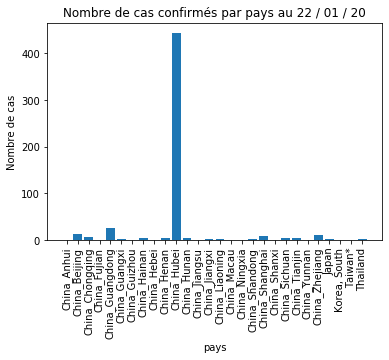

In [17]:
# Étude du premier pic obtenu précédemment
df_pays_01_22 = df.loc[df["Date"] == "2020-01-22"]
df_pays_01_22.head()
df_pays_01_22.shape
test = df_pays_01_22[df_pays_01_22['Country_Region'].isin(pays_22_01[0])]
test.shape
test.head()

%matplotlib inline
plt.xticks(rotation=90)
plt.bar(test["Country_Region"], test["ConfirmedCases"])
plt.xlabel("pays")
plt.ylabel("Nombre de cas")
plt.title("Nombre de cas confirmés par pays au 22 / 01 / 20")
plt.savefig('Fig/confirmed_cases_01-22.png')
plt.show()

(41, 38)


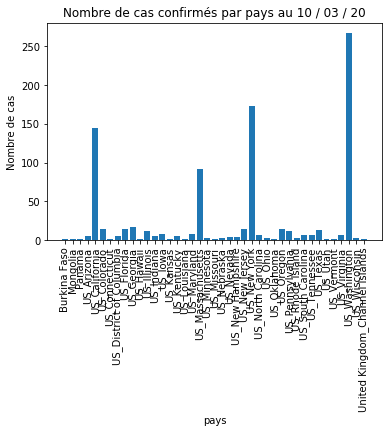

In [18]:
# Étude du deuxième pic obtenu précédemment
df_pays_03_10 = df.loc[df["Date"] == "2020-03-10"]
df_pays_03_10.head()
df_pays_03_10.shape
test = df_pays_03_10[df_pays_03_10['Country_Region'].isin(pays_10_03[0])]
print(test.shape)
test.head()

%matplotlib inline
plt.xticks(rotation=90)
plt.bar(test["Country_Region"], test["ConfirmedCases"])
plt.xlabel("pays")
plt.ylabel("Nombre de cas")
plt.title("Nombre de cas confirmés par pays au 10 / 03 / 20")
plt.savefig('Fig/confirmed_cases_03-10.png')
plt.show()

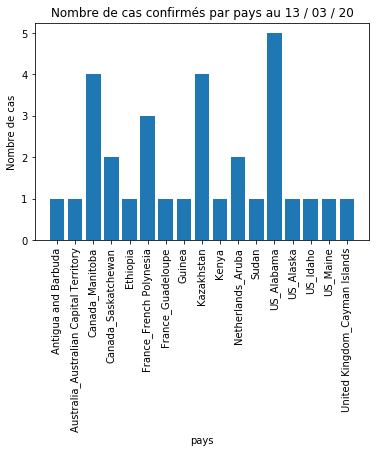

In [19]:
# Étude du troisième pic obtenu précédemment
df_pays_03_13 = df.loc[df["Date"] == "2020-03-13"]
df_pays_03_13.head()
df_pays_03_13.shape
test = df_pays_03_13[df_pays_03_13['Country_Region'].isin(pays_13_03[0])]
test.shape
test.head()

%matplotlib inline
plt.xticks(rotation=90)
plt.bar(test["Country_Region"], test["ConfirmedCases"])
plt.xlabel("pays")
plt.ylabel("Nombre de cas")
plt.title("Nombre de cas confirmés par pays au 13 / 03 / 20")
plt.savefig('Fig/confirmed_cases_03-13.png')
plt.show()

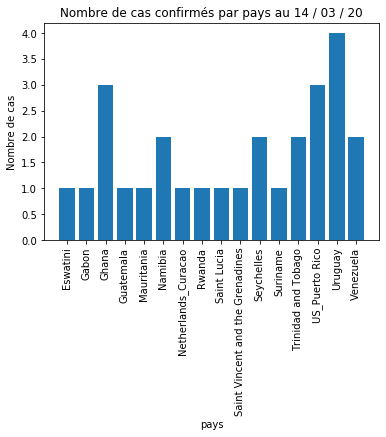

In [20]:
# Étude du quatrième pic obtenu précédemment
df_pays_03_14 = df.loc[df["Date"] == "2020-03-14"]
df_pays_03_14.head()
df_pays_03_14.shape
test = df_pays_03_14[df_pays_03_14['Country_Region'].isin(pays_14_03[0])]
test.shape
test.head()

%matplotlib inline
plt.xticks(rotation=90)
plt.bar(test["Country_Region"], test["ConfirmedCases"])
plt.xlabel("pays")
plt.ylabel("Nombre de cas")
plt.title("Nombre de cas confirmés par pays au 14 / 03 / 20")
plt.savefig('Fig/confirmed_cases_03-14.png')
plt.show()

Max confirmed cases :  74386.0
(1, 38)
Pays concerné :  9023    Italy
Name: Country_Region, dtype: object
(64, 38)


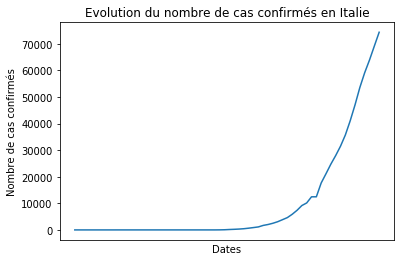

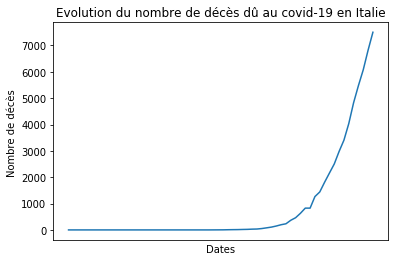

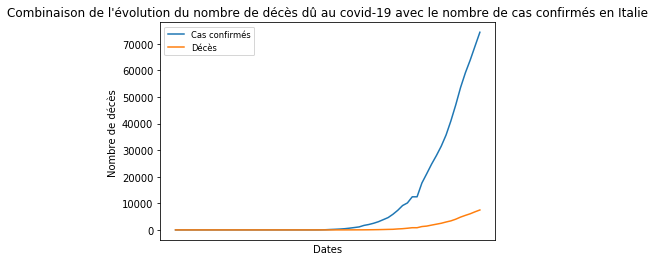

In [21]:
# Étude sur l'Italie
# Max confirmed cases 74386.000000, visiblement il s'agit de l'Italie
print("Max confirmed cases : ",df.ConfirmedCases.max())
test = df.loc[df["ConfirmedCases"] == 74386.000000]
print(test.shape)
#print(test.head())
print("Pays concerné : ", test["Country_Region"])
test = df.loc[df["Country_Region"] == "Italy"]
print(test.shape)


%matplotlib inline
plt.xticks(rotation=90)
plt.plot(test["Date"], test["ConfirmedCases"])
plt.xlabel("Dates")
plt.xticks([])
plt.ylabel("Nombre de cas confirmés")
plt.title("Evolution du nombre de cas confirmés en Italie")
plt.figure(1, figsize=(20,20))
plt.savefig('Fig/evolution_confirmed_cases_italy.png')
plt.show()

%matplotlib inline
plt.xticks(rotation=90)
plt.plot(test["Date"], test["Fatalities"])
plt.xlabel("Dates")
plt.xticks([])
plt.ylabel("Nombre de décès ")
plt.title("Evolution du nombre de décès dû au covid-19 en Italie")
plt.figure(1, figsize=(20,20))
plt.savefig('Fig/evolution_death_italy.png')
plt.show()

%matplotlib inline
plt.xticks(rotation=90)
plt.plot(test["Date"], test["ConfirmedCases"])
plt.plot(test["Date"], test["Fatalities"])
plt.xlabel("Dates")
plt.xticks([])
plt.ylabel("Nombre de décès ")
plt.title("Combinaison de l'évolution du nombre de décès dû au covid-19 avec le nombre de cas confirmés en Italie")
plt.figure(1, figsize=(20,20))
plt.legend(('Cas confirmés', 'Décès'),loc="upper left", fontsize='small')
plt.savefig('Fig/evolution_death_confirmed_cases_italy.png')
plt.show()


In [67]:
# Cleaning dataset

df_bin = df.copy(deep = True)
df_bin = df_bin.drop(columns = ["Id", "Province_State"])
print(df_bin.shape)
df_bin = pd.get_dummies(df_bin)
print(df_bin.shape)

(18816, 36)
(18816, 392)


In [68]:
df_bin.head()

ConfirmedCases  Fatalities   age_0-4   age_5-9  age_10-14  age_15-19  \
0             0.0         0.0  0.145717  0.139133   0.133376   0.118922   
1             0.0         0.0  0.145717  0.139133   0.133376   0.118922   
2             0.0         0.0  0.145717  0.139133   0.133376   0.118922   
3             0.0         0.0  0.145717  0.139133   0.133376   0.118922   
4             0.0         0.0  0.145717  0.139133   0.133376   0.118922   

   age_20-24  age_25-29  age_30-34  age_35-39  ...  Date_2020-03-16  \
0   0.100864   0.079875   0.063662   0.052825  ...                0   
1   0.100864   0.079875   0.063662   0.052825  ...                0   
2   0.100864   0.079875   0.063662   0.052825  ...                0   
3   0.100864   0.079875   0.063662   0.052825  ...                0   
4   0.100864   0.079875   0.063662   0.052825  ...                0   

   Date_2020-03-17  Date_2020-03-18  Date_2020-03-19  Date_2020-03-20  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_2020-03-21  Date_2020-03-22  Date_2020-03-23  Date_2020-03-24  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_2020-03-25  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 392 columns]

[9.99923716e-01 6.32314129e-05]


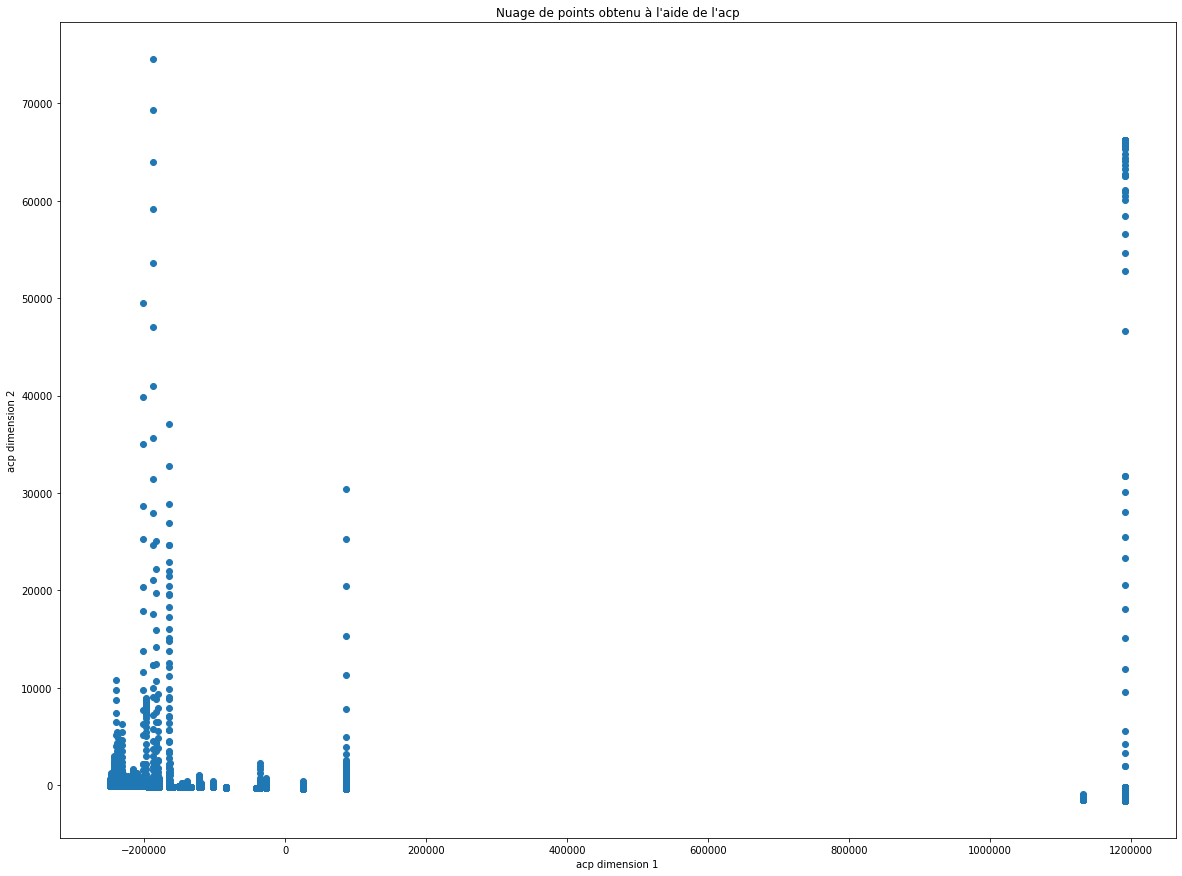

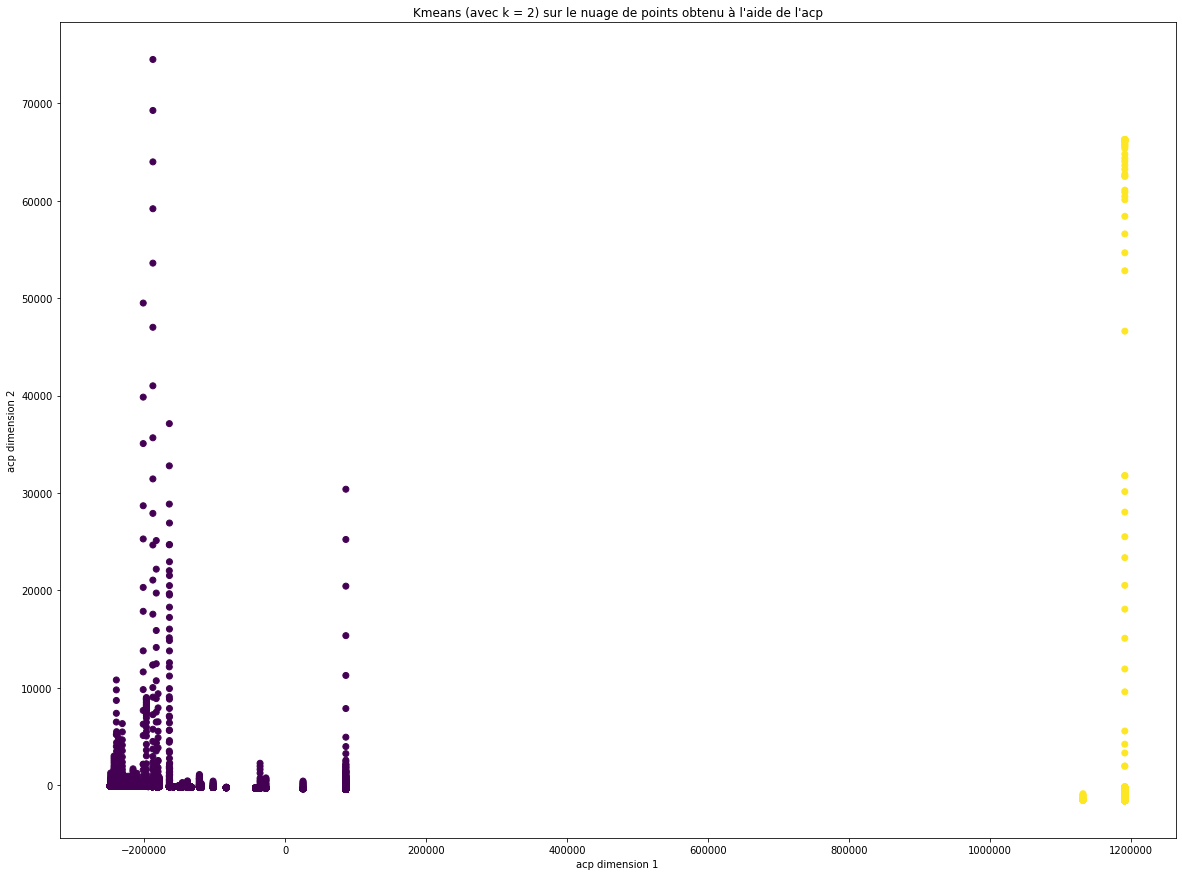

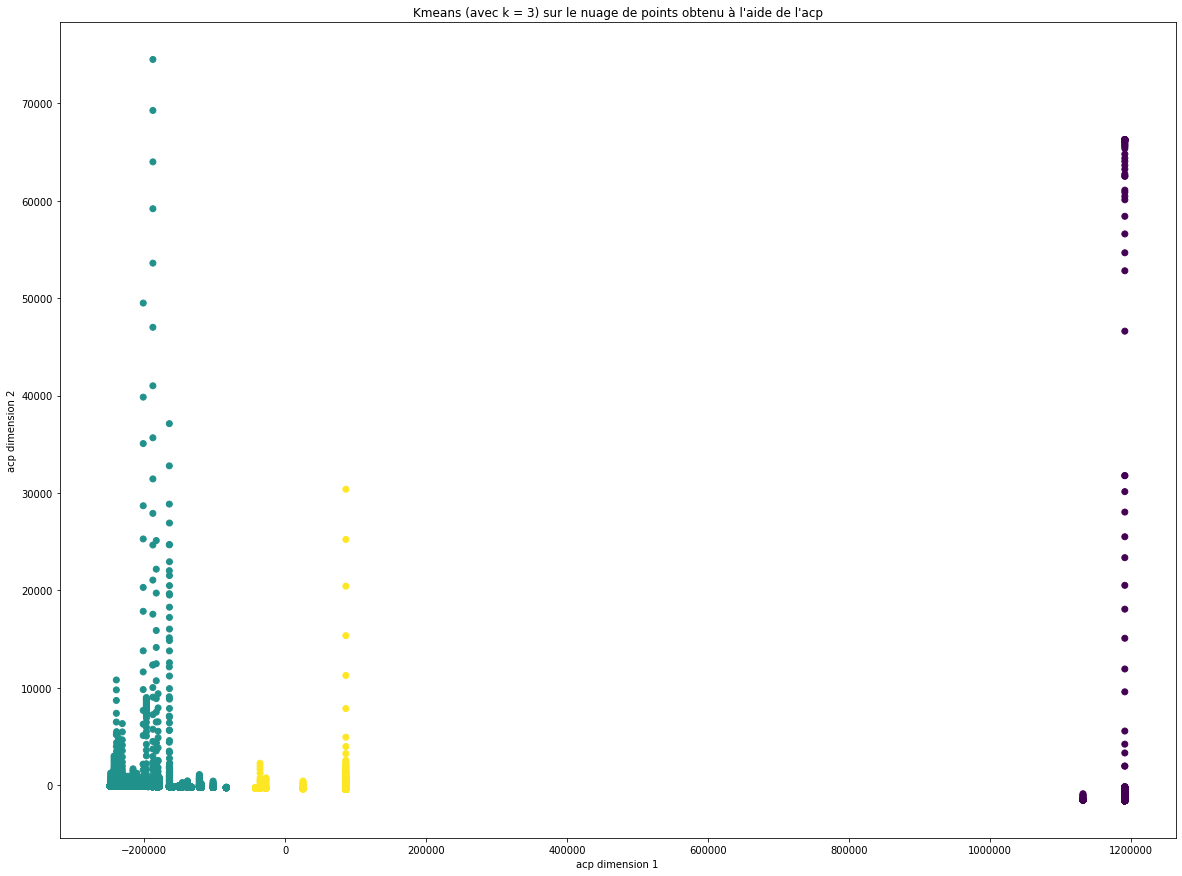

In [108]:
# ACP pour pouvoir réaliser du clustering sur le dataset binarisé
acp = PCA(n_components=2)
acp_res = acp.fit_transform(df_bin)
print(acp.explained_variance_ratio_)
# Les résultats obtenus ne sont pas satisfaisant car overfitting 
# sur le premier axe avec 99 % des données expliquées
# ==> essayer de le faire avec un ensemble d'entrainement

# Print ACP results
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1])
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/acp_results.png')
plt.show()

# Tentative de cas Kmeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_bin)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 2) sur le nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/kmeans_results_c2.png')
plt.show()

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_bin)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 3) sur le nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/kmeans_results.png')
plt.show()

[9.99920406e-01 6.69458935e-05]
(15052, 2)


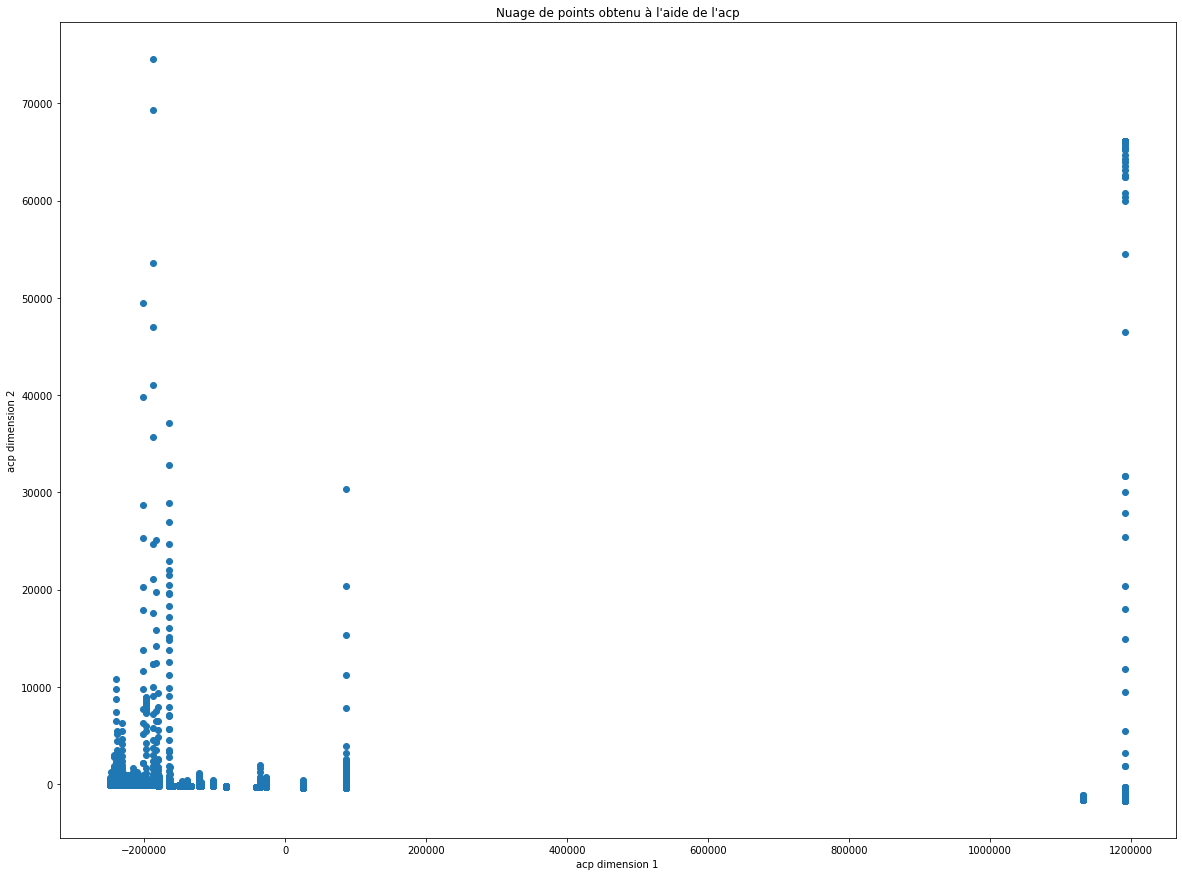

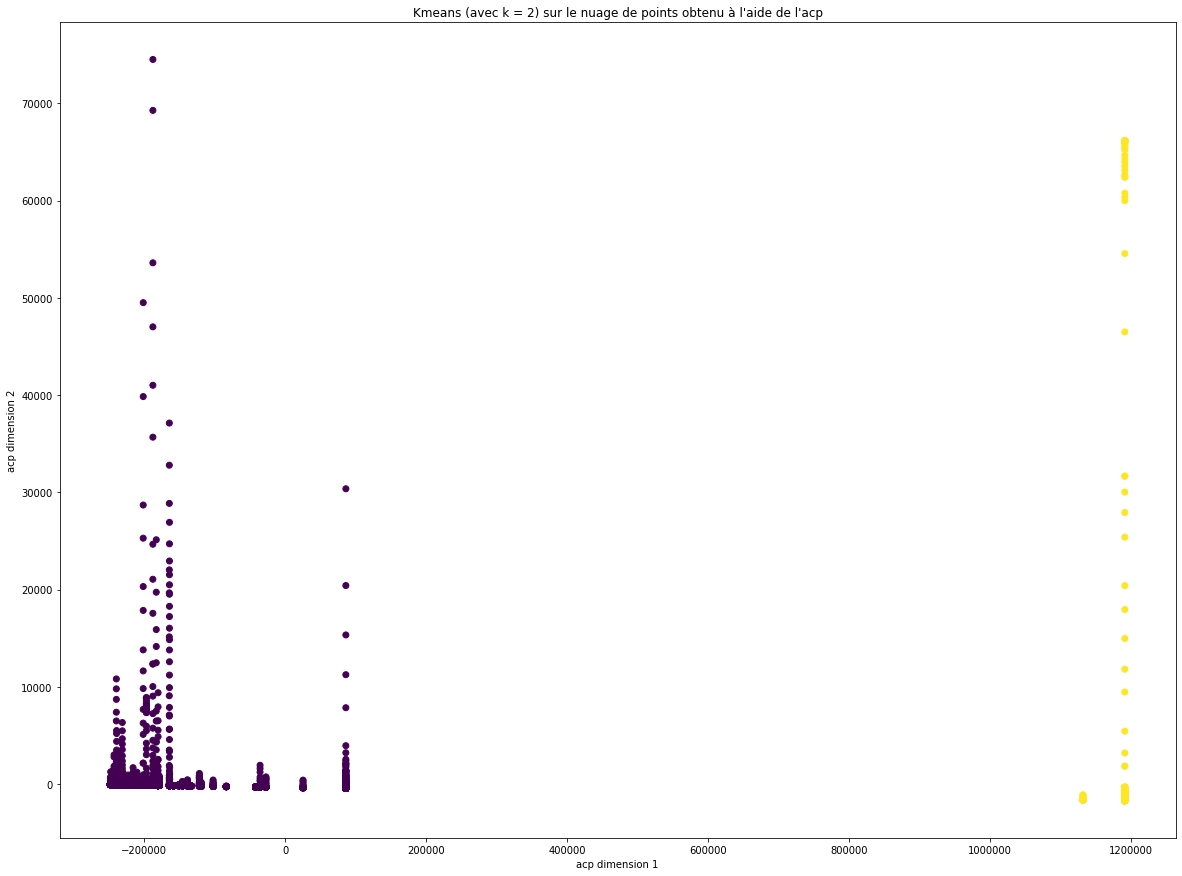

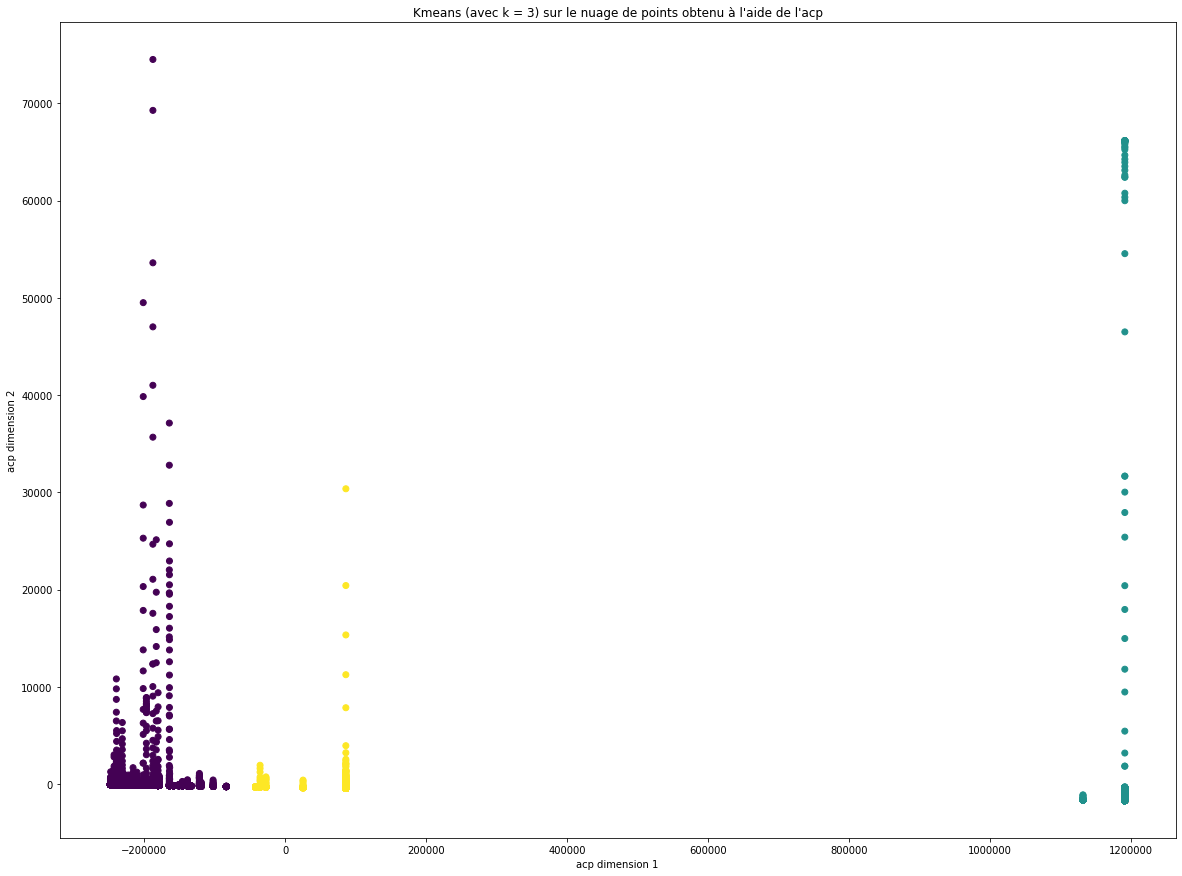

In [106]:
df_bin_train, df_bin_test= train_test_split(df_bin, test_size=0.2)

# ACP sur le dataset binarisé
acp = PCA(n_components=2)
acp_res = acp.fit_transform(df_bin_train)
print(acp.explained_variance_ratio_)
# Les valeurs ne changent que très peu
print(acp_res.shape)

# Print ACP results
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1])
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/acp_results_2.png')
plt.show()

# Tentative de cas Kmeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_bin_train)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 2) sur le nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/kmeans_results_2_c2.png')
plt.show()

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_bin_train)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 3) sur le nuage de points obtenu à l'aide de l'acp")
plt.savefig('Fig/kmeans_results_2.png')
plt.show()

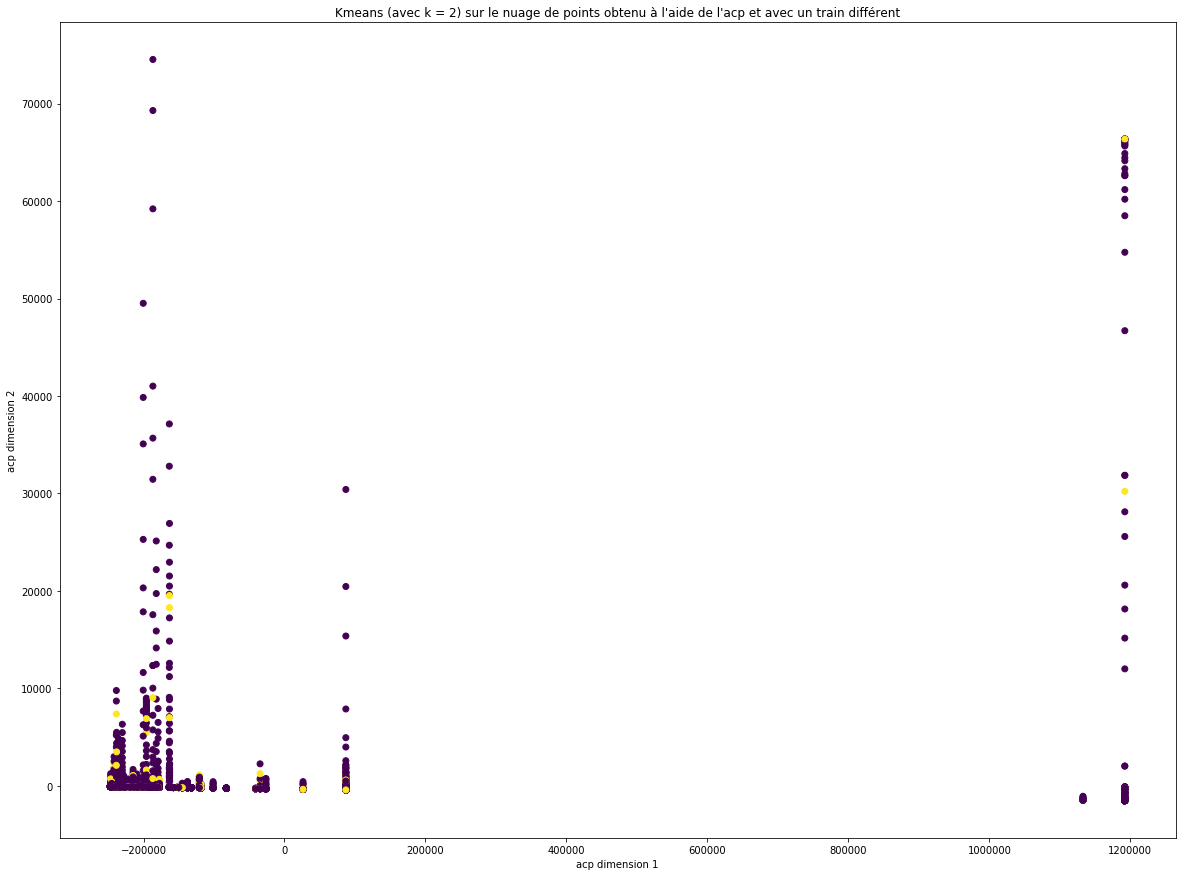

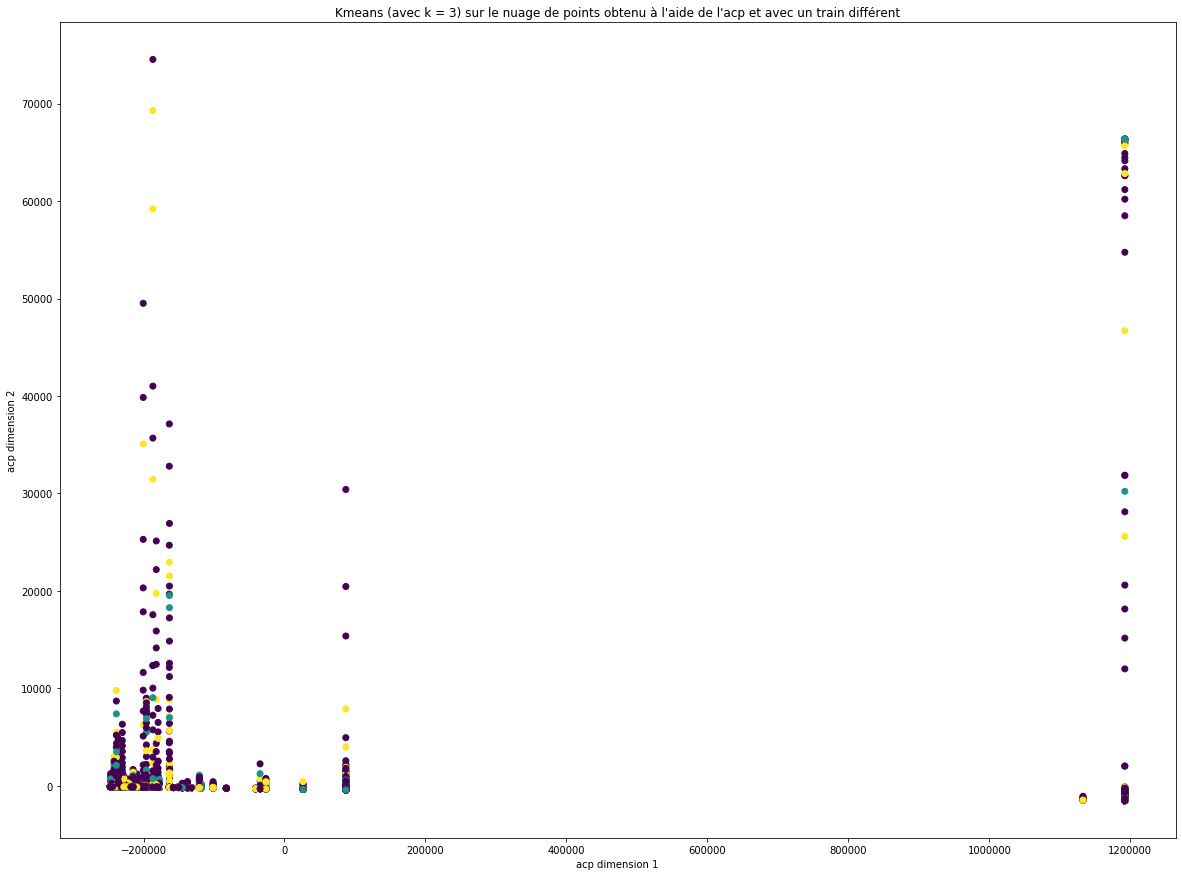

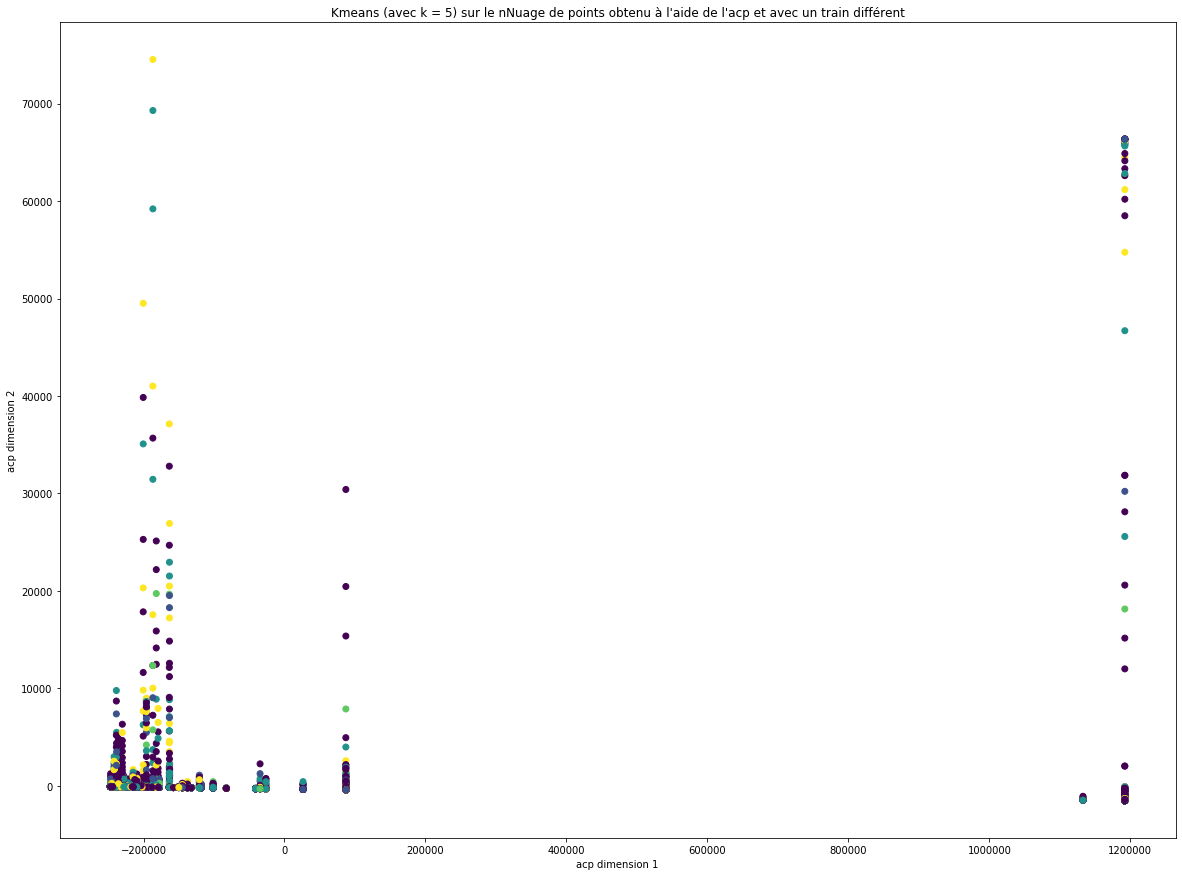

In [105]:
# Tentative de cas Kmeans

df_bin_train, df_bin_test= train_test_split(df_bin, test_size=0.2)

kmeans = KMeans(n_clusters = 2)
#kmeans.fit(df_bin)
kmeans.fit(df_bin_train)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 2) sur le nuage de points obtenu à l'aide de l'acp et avec un train différent")
plt.savefig('Fig/kmeans_results_5.png')
plt.show()


kmeans = KMeans(n_clusters = 3)
#kmeans.fit(df_bin)
kmeans.fit(df_bin_train)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 3) sur le nuage de points obtenu à l'aide de l'acp et avec un train différent")
plt.savefig('Fig/kmeans_results_3.png')
plt.show()


kmeans = KMeans(n_clusters = 5)
#kmeans.fit(df_bin)
kmeans.fit(df_bin_train)
%matplotlib inline
plt.figure(figsize=(20,15))
plt.scatter(acp_res[:,0], acp_res[:,1], c=kmeans.labels_)
plt.xlabel("acp dimension 1")
plt.ylabel("acp dimension 2")
plt.title("Kmeans (avec k = 5) sur le nNuage de points obtenu à l'aide de l'acp et avec un train différent")
plt.savefig('Fig/kmeans_results_4.png')
plt.show()